In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# Problem 1

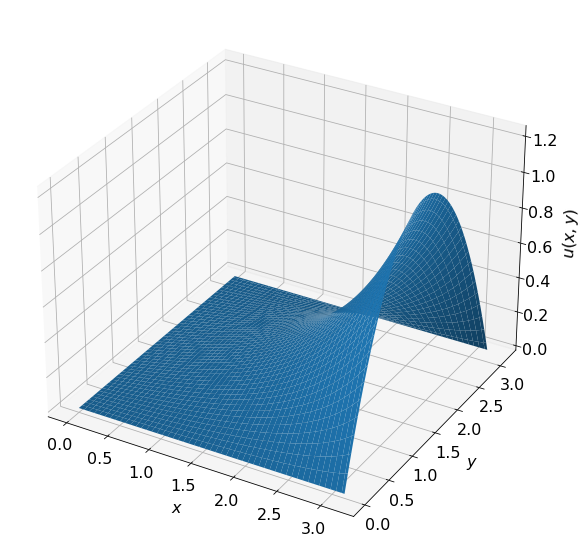

In [42]:
x = np.linspace(0, np.pi, 100)
y = x.copy()
X, Y = np.meshgrid(x, y)
u_n = lambda n, x, y: -2*(np.cos(np.pi * n) - 1)/(np.sinh(np.pi * n)*np.pi*n**3) * \
                        np.sinh(n*x)*np.sin(n*y)
sol = np.zeros(X.shape)
for n in range(1, 100 + 1):
    sol += u_n(n, X, Y)
    

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, sol)
ax.set_xlabel('$x$', labelpad=10)
ax.set_ylabel('$y$', labelpad=10)
ax.set_zlabel('$u(x, y)$', labelpad=10)
plt.show()

# Problem 2

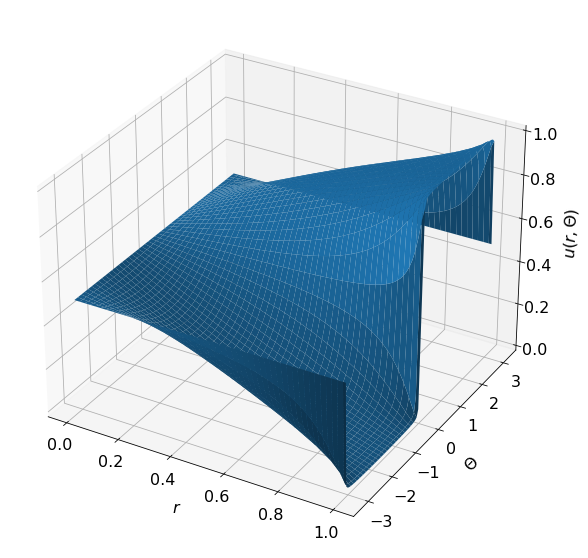

In [43]:
r = np.linspace(0, 1, 100)
theta = np.linspace(-np.pi, np.pi, 100)
R, Theta = np.meshgrid(r, theta)
sol = 0.5 * np.ones(R.shape)
u_n = lambda n, r, t: (1 - np.cos(n*np.pi))/(np.pi * n) * r**n * np.sin(n*t)

for n in range(1, 200 + 1):
    sol += u_n(n, R, Theta)
    
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(R, Theta, sol)
ax.set_xlabel('$r$', labelpad=10)
ax.set_ylabel('$\Theta$', labelpad=10)
ax.set_zlabel('$u(r, \Theta)$', labelpad=10)
plt.show()

In [44]:
# For Generating Piecewise Solution
def piecewiseSolution(r, t):
    sol = np.where(
        (t > 0) & (t < np.pi),
        1 - 1/np.pi * np.arctan((1 - r**2)/(2*R*np.sin(t))),
        np.where(
            (t > -np.pi) & (t < 0),
            - 1/np.pi * np.arctan((1 - r**2)/(2*R*np.sin(t))),
            0.5
        )
    )
    return sol

C:\Users\pwest\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\pwest\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


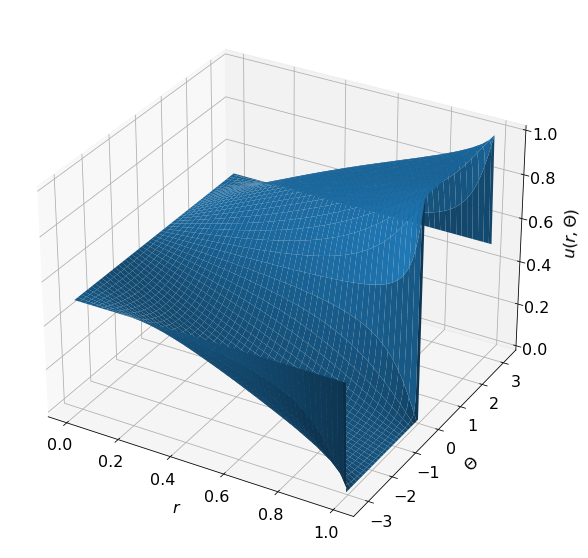

In [45]:
# Plotting Piecewise
sol = piecewiseSolution(R, Theta)
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(R, Theta, sol)
ax.set_xlabel('$r$', labelpad=10)
ax.set_ylabel('$\Theta$', labelpad=10)
ax.set_zlabel('$u(r, \Theta)$', labelpad=10)
plt.show()